In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv(r"C:\Users\ADMIN\Downloads\data_binary_encoded.csv")
df

,NoEmp,NewExist,SBA_GrPortion,RealEstate,State_0,State_1,State_2,State_3,State_4,State_5,NAICS_0,NAICS_1,NAICS_2,NAICS_3,NAICS_4,LowDoc_0,LowDoc_1,MIS_Status_0,MIS_Status_1
0,4,1.0,0.80,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1
1,2,1.0,0.80,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
2,7,0.0,0.75,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1
3,19,0.0,0.75,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
4,1,1.0,0.80,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691393,20,0.0,0.50,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
691394,40,0.0,0.75,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
691395,6,0.0,0.80,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1
691396,6,0.0,0.50,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1


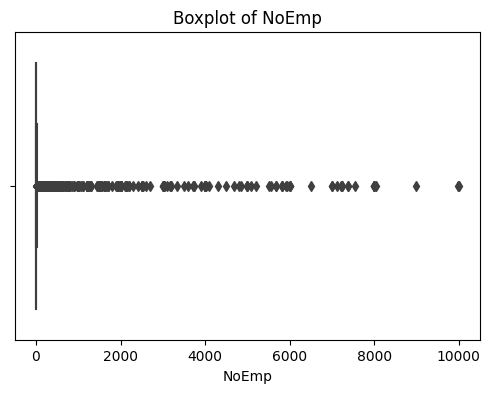

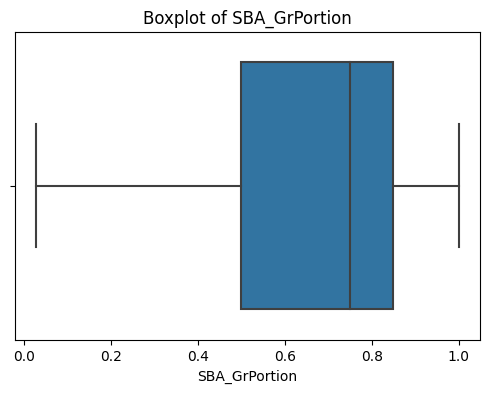

In [2]:
# because after encoding some columns with values of 0 and 1 
# there will be no outliers in those columns. Therefore, we will focus on handling outliers in the remaining columns.
# Plot the boxplot for "NoEmp"
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='NoEmp')
plt.title('Boxplot of NoEmp')

# Display the boxplot for "NoEmp"
plt.show()

# Plot the boxplot for "SBA_GrPortion"
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='SBA_GrPortion')
plt.title('Boxplot of SBA_GrPortion')

# Display the boxplot for "SBA_GrPortion"
plt.show()

<sub>From the two plots above, we can observe that outliers only appear in the "NoEmp" column.</sub>

<sub> From the distribution of NoEmp we could see there are some outliers. Companies with more than 1500 employees are not eligible for SBA loans. References :

"According to the SBA, a small businesses have a maximum of anywhere between 250 and 1500 employees— all depending on the specific industry the business is in. Additionally, businesses have revenue limits that they must not exceed if they want to qualify for SBA financing. In general, companies with more than 1500 employees are not eligible for SBA loans."
References: https://www.sba7a.loans/sba-7a-loans-small-business-blog/small-business-definition
</sub>

In [3]:
# check total of NoEmp that outlier

df[df['NoEmp'] >= 1500][['MIS_Status_0','MIS_Status_1']].value_counts()


MIS_Status_0  MIS_Status_1
0             1               103
1             0                11
Name: count, dtype: int64

In [4]:
# Take out the outlier of NoEmp
df = df[df['NoEmp'] <= 1500]
df

,NoEmp,NewExist,SBA_GrPortion,RealEstate,State_0,State_1,State_2,State_3,State_4,State_5,NAICS_0,NAICS_1,NAICS_2,NAICS_3,NAICS_4,LowDoc_0,LowDoc_1,MIS_Status_0,MIS_Status_1
0,4,1.0,0.80,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1
1,2,1.0,0.80,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
2,7,0.0,0.75,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1
3,19,0.0,0.75,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
4,1,1.0,0.80,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691393,20,0.0,0.50,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
691394,40,0.0,0.75,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
691395,6,0.0,0.80,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1
691396,6,0.0,0.50,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1
